 Works with the HMF files. Takes the windows from the Del labeled windows from all chromosomes. The windows were labeled by HMF with a caller. Then performs normalization of the channels, that depends on the median coverage and expected library insert size. Then plots every fifth of the windows.

## Load dependences and setting output configuration

In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
%pylab inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Load data from npy files

In [2]:
datapath='F:/1_GTCG/data/20_04_18/HMF_Data_200418.tar/HMF_Data_200418/channelData/'
datapath_labels = 'F:/1_GTCG/data/20_04_18/HMF_Data_200418.tar/HMF_Data_200418/labels/labels/'
filename = '_channel_maker_real.npy'

In [27]:
i=1
data =np.load(datapath + str(i) + filename)
labels = np.load(datapath_labels + str(i) + '_labels.npy') 
X_test=data[np.where(labels != 'no_del')]
y_test = labels[np.where(labels != 'no_del')]
#X_test = X_test[:, [0,1,2,11,12,13], :]#only the 6 channels: coverage and clipped ends
data = []
labels = []

In [28]:
for i in range(2,23):
        data =np.load(datapath + str(i) + filename)
        labels = np.load(datapath_labels + str(i) + '_labels.npy') 
        X_test_partial=data[np.where(labels != 'no_del')]
        y_test_partial = labels[np.where(labels != 'no_del')]
        data = []
        labels = []
        #X_test_partial= X_test_partial[:, [0,1,2,11,12,13], :]#only the 6 channels: coverage and clipped ends
        X_test = np.concatenate((X_test, X_test_partial))
        y_test = np.concatenate((y_test, y_test_partial))
        

In [29]:
X_test.shape

(338, 22, 50)

In [30]:
y_test.shape

(338,)

In [31]:
y_test[np.where(y_test == 'del_start_and_end')]

array([], 
      dtype='<U9')

In [18]:
X_test = X_test[np.where(y_test != 'del_start_and_end')]
y_test = y_test[np.where(y_test != 'del_start_and_end')]

In [32]:
X_test.shape

(338, 22, 50)

In [ ]:
y_test

In [34]:
i=13
data =np.load(datapath + str(i) + filename)
labels = np.load(datapath_labels + str(i) + '_labels.npy') 

In [35]:
X=data[np.where(labels == 'no_del')]
y= labels[np.where(labels == 'no_del')]
#X_test = X_test[:, [0,1,2,11,12,13], :]
data = []
labels = []

In [36]:
X.shape

(119665, 22, 50)

In [37]:
X=X[:150]
y=y[:150]

In [38]:
X.shape

(150, 22, 50)

In [39]:
X_test = np.concatenate((X_test,X),axis = 0)
y_test = np.concatenate((y_test,y), axis = 0)

In [41]:
X_test.shape

(488, 22, 50)

## Save 

In [42]:
np.save(datapath + 'X_50_allSVs_22channels.npy', X_test)
np.save(datapath + 'y_50_allSVs_22channels.npy', y_test)

### Load the SV files

In [170]:
X_test=np.load(datapath + 'X_50_allSVs_22channels.npy')
y_test=np.load(datapath + 'y_50_allSVs_22channels.npy')

In [171]:
X_test.shape

(488, 22, 50)

In [153]:
#X_test = X_test[0:338]
#y_test = y_test[0:338]

In [172]:
y_test.shape

(488,)

### Number of channels

In [173]:
number_channels = X.shape[1]
number_channels

22

In [ ]:
X[0][1]

In [ ]:
X[0][3]

## Normalize data 

In [174]:
coverage = np.median(X_test[:, 11, :]) #the median of the coverage in the normal cells
coverage

34.0

In [144]:
#not used now
expected_distance = 150
def normalize(X):       
    for i in range (0, len(X)):            
        for k in [3,5]:
            X[i][k] = np.divide(X[i][k],  X[i][1]/2 + 1/(10*X[i][1]+1)) #divide by number of clips
        for k in [4,6]:            
            X[i][k] = np.divide(X[i][k],  X[i][2]/2 +  1/(10*X[i][2]+1))
        for k in [3+11,5+11]:
            X[i][k] = np.divide(X[i][k],  X[i][1+11]/2 +  1/(10*X[i][12]+1))
        for k in [4+11,6+11]:            
            X[i][k] = np.divide(X[i][k],  X[i][2+11]/2+  1/(10*X[i][13]+1))
        for k in [3,4,5,6,14,15,16,17]:#the distance channels
            X[i][k] = np.divide(X[i][k], expected_distance)
        for j in range(0,number_channels):                                                                             
            X[i][j] = np.divide(X[i][j], coverage)*100     
#normalize(X_train)
#normalize(X_val)
#normalize(X_test)

In [175]:
expected_distance = 150
def normalize(X):       
    for i in range (0, len(X)):                    
        for k in [3,4,5,6,14,15,16,17]:#the distance channels
            X[i][k] = np.divide(X[i][k], expected_distance)
        for j in range(0,number_channels):                                                                             
            X[i][j] = np.divide(X[i][j], coverage)*100     
#normalize(X_train)
#normalize(X_val)
normalize(X_test)

In [176]:
def eliminate_noise_chanels(X):
    return np.delete(X, [3, 6, 14, 17], axis=1)

In [177]:
X_test = eliminate_noise_chanels(X_test)

In [178]:
number_channels = X_test.shape[1]
number_channels

18

In [161]:
def eliminate_dist_channels(X):
    return np.delete(X, [3, 4, 7, 8, 12, 13, 16, 17], axis=1)

In [162]:
#X_test = eliminate_dist_channels(X_test)

## Plots several  windows 

In [109]:

label = ["None"] * number_channels

In [110]:
label[0] = "tumor:coverage"
label[1] = "tumor:#left clipped reads"
label[2] = "tumor:#right clipped reads"
label[3] = "tumor:sum of distances to mates for forward reads"
label[4] = "tumor:sum of distances to mates for reverse reads"
label[5] = "tumor:#split reads left split"
label[6] = "tumor:#split reads right split"
label[7] = "tumor:sum of gaps for left split reads"
label[8] = "tumor: sum of gaps for right split reads"

In [111]:
label[0+9] = "normal:coverage"
label[1+9] = "normal:#left clipped reads"
label[2+9] = "normal:#right clipped reads"
label[3+9] = "normal:sum of distances to mates for forward reads"
label[4+9] = "normal:sum of distances to mates for reverse reads"
label[5+9] = "normal:#split reads left split"
label[6+9] = "normal:#split reads right split"
label[7+9] = "normal:sum of gaps for left split reads"
label[8+9] = "normal: sum of gaps for right split reads"

In [112]:
from numpy import *
import math
import matplotlib.pyplot as plt

colors =['b','g', 'm', 'gray', 'r','c', 'darkgreen' ,'y', 'k', 'orange', 'gray']

def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows, 5):
        print(y_train[i], 'id:', i)
        print('id:', i)
        for j in range (0, number_channels):   
            shift = 0
            start =0
            if j in [0,11]:
                shift = -100
            if j > 10:
                start = -60
            Z = [start + shift + 300 + x - 5*j*4 for x in X_train[i][j]]  
            #plt.ylim([100,700])
            if np.max(Z) > 1000:
                plt.ylim([-200,1000])
                Z = [start + shift + 300 + x - 5*j*4 - 400 for x in X_train[i][j]]  
            if j>10:
                plt.plot(Z,  label = label[j], linestyle=':', linewidth=1.5, color = colors[j % 11])
            else:
                plt.plot(Z, label = label[j], color = colors[j])
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})    
        plt.show()

del_end id: 200
id: 200


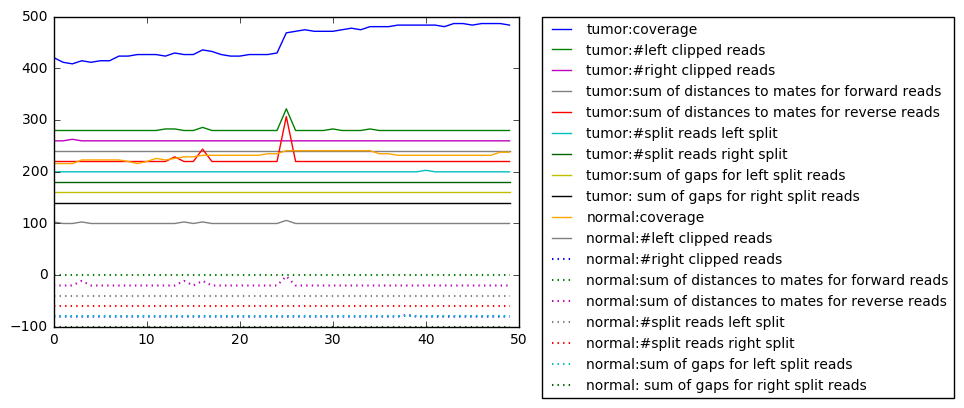

del_start id: 205
id: 205


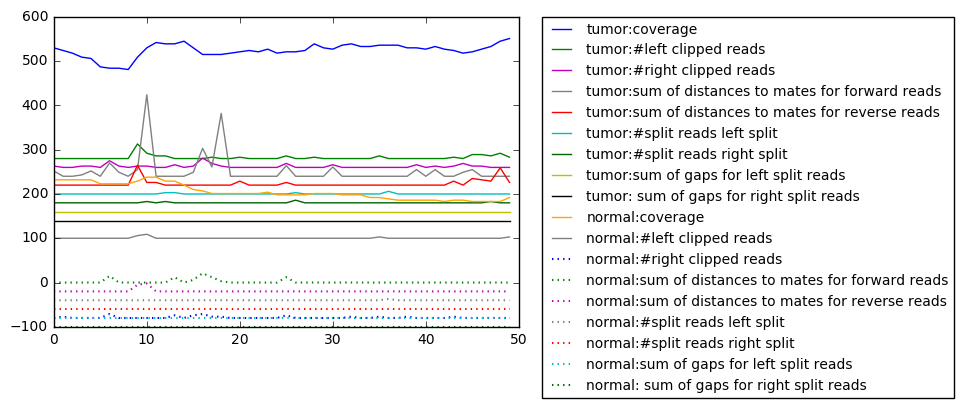

del_start id: 210
id: 210


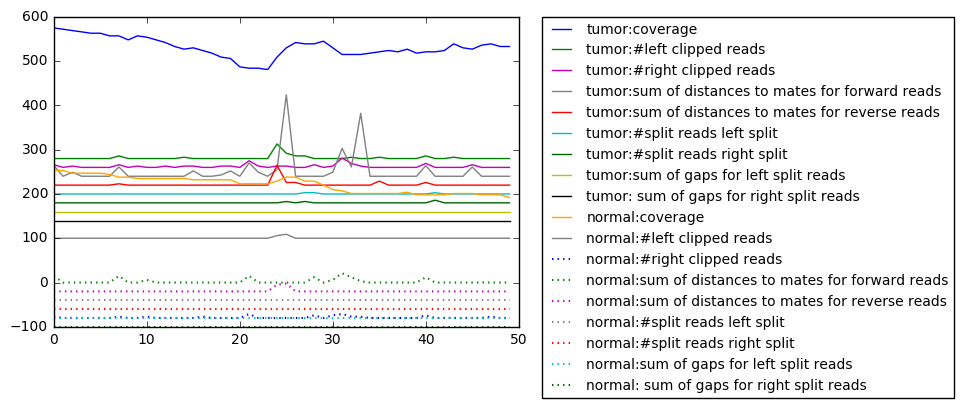

del_start id: 215
id: 215


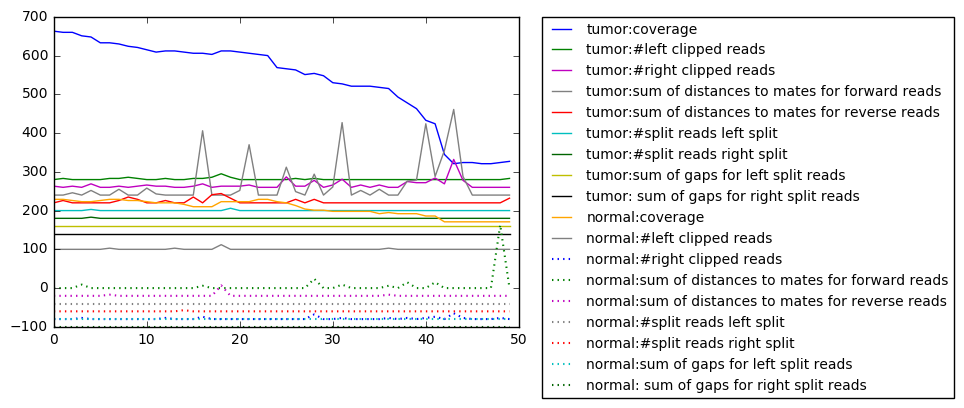

del_start id: 220
id: 220


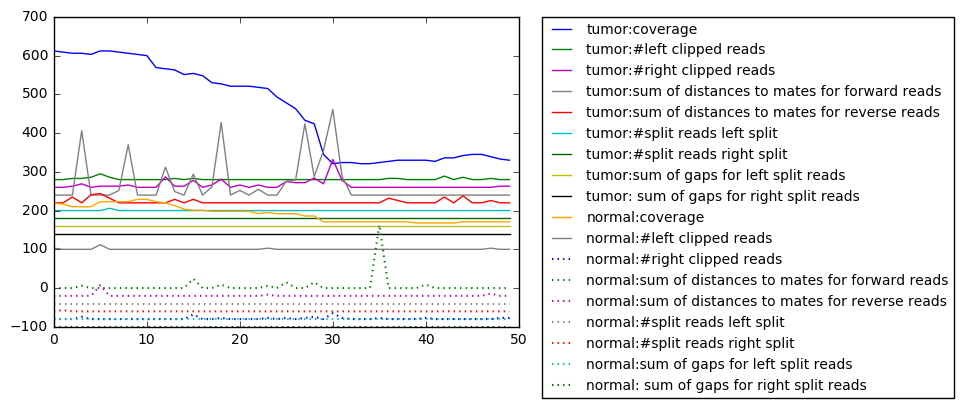

del_start id: 225
id: 225


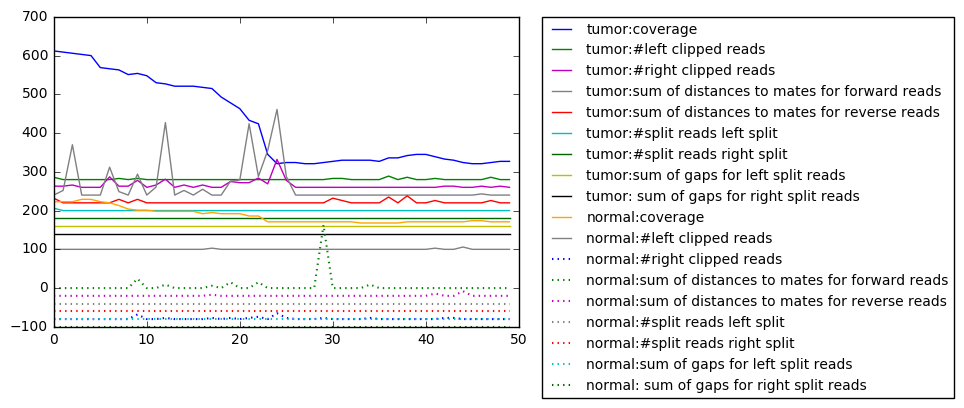

del_end id: 230
id: 230


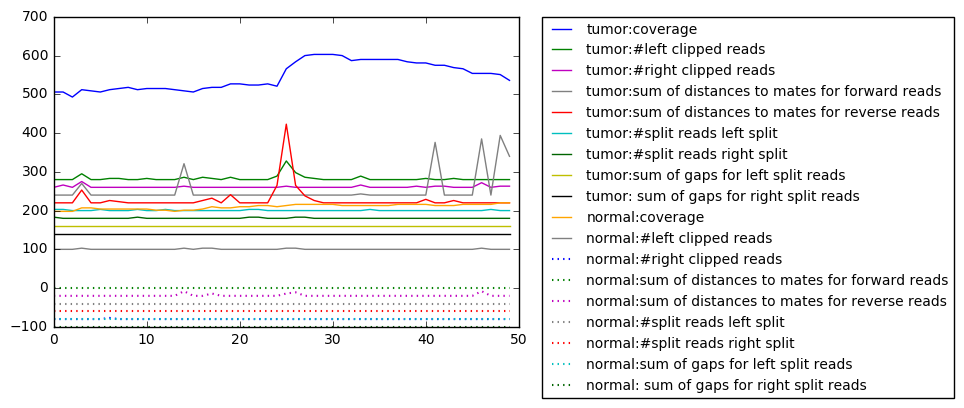

del_start id: 235
id: 235


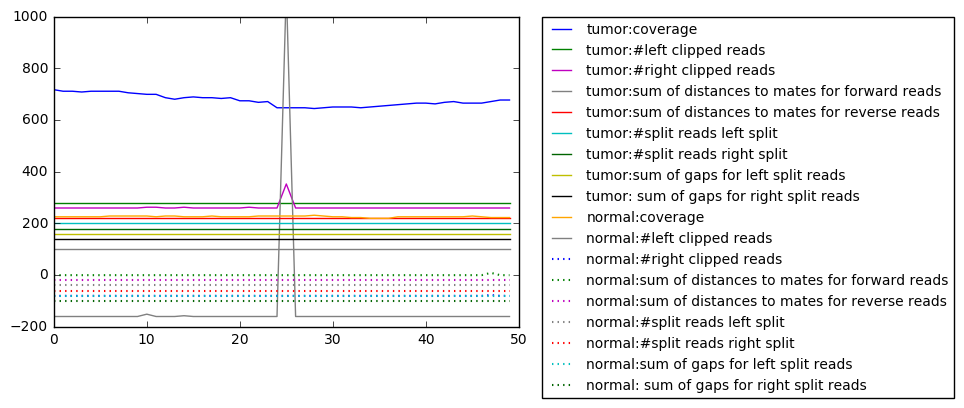

del_start id: 240
id: 240


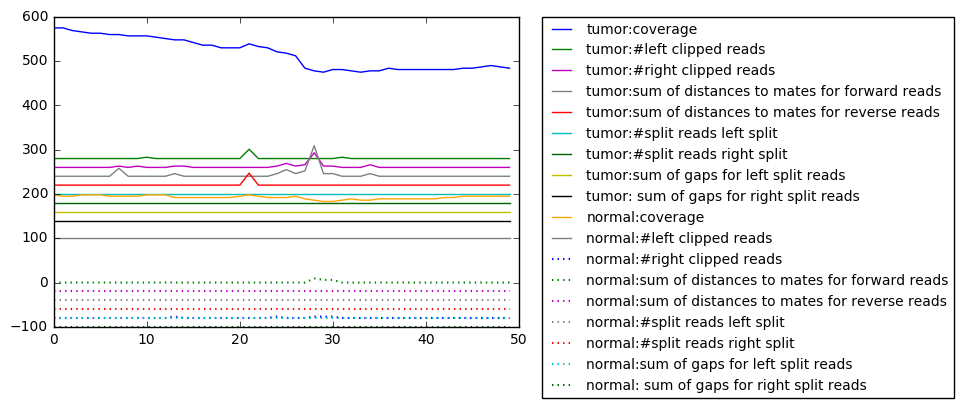

del_end id: 245
id: 245


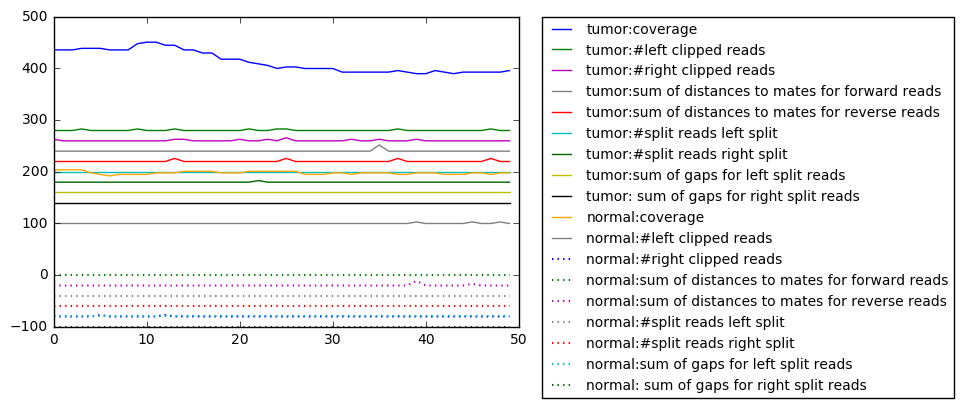

del_end id: 250
id: 250


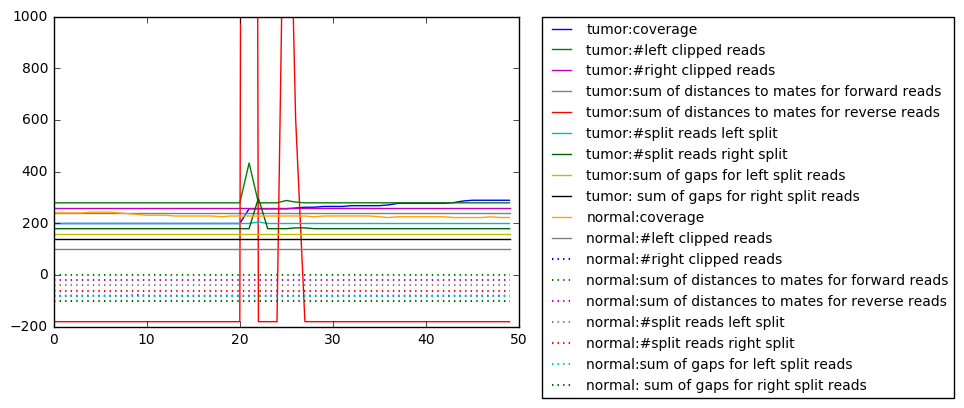

del_end id: 255
id: 255


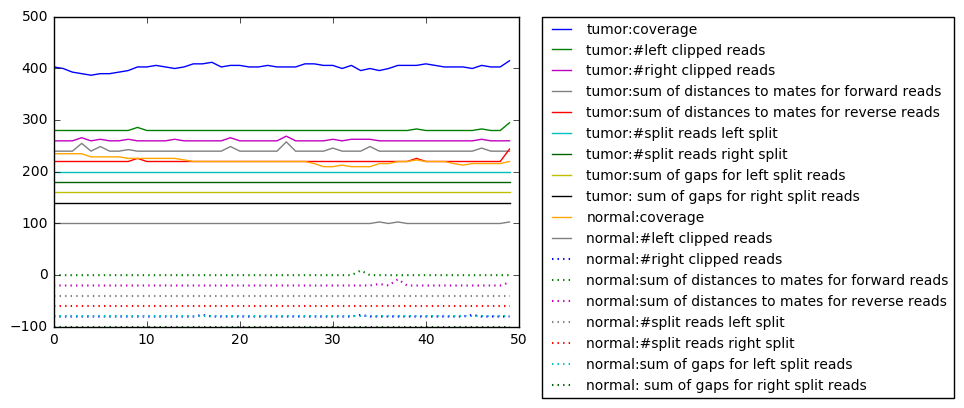

del_end id: 260
id: 260


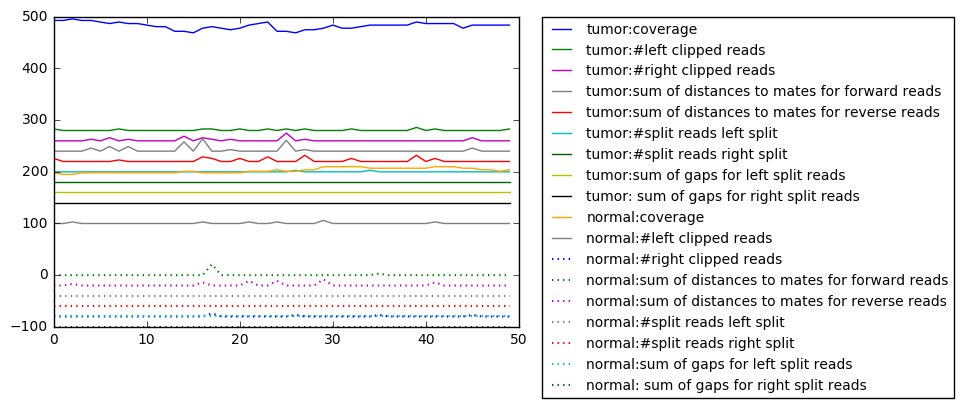

del_start id: 265
id: 265


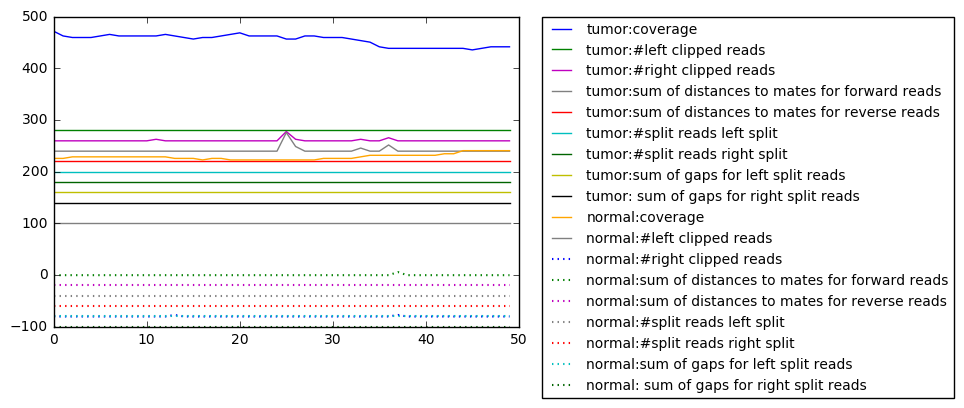

del_start id: 270
id: 270


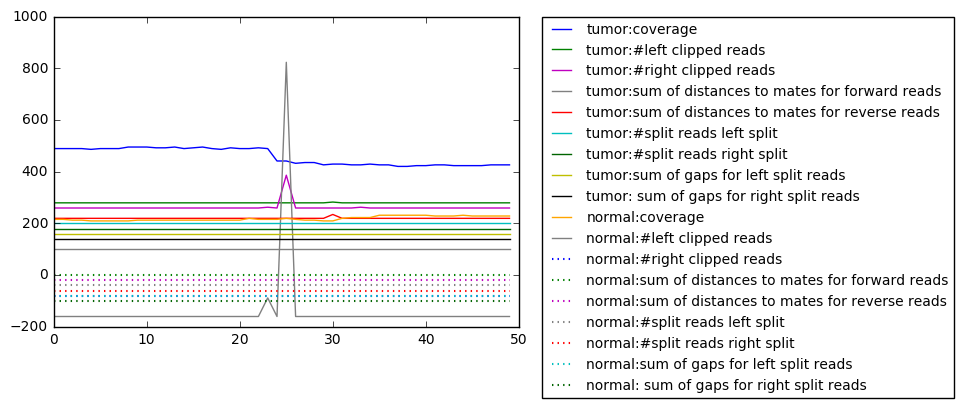

del_end id: 275
id: 275


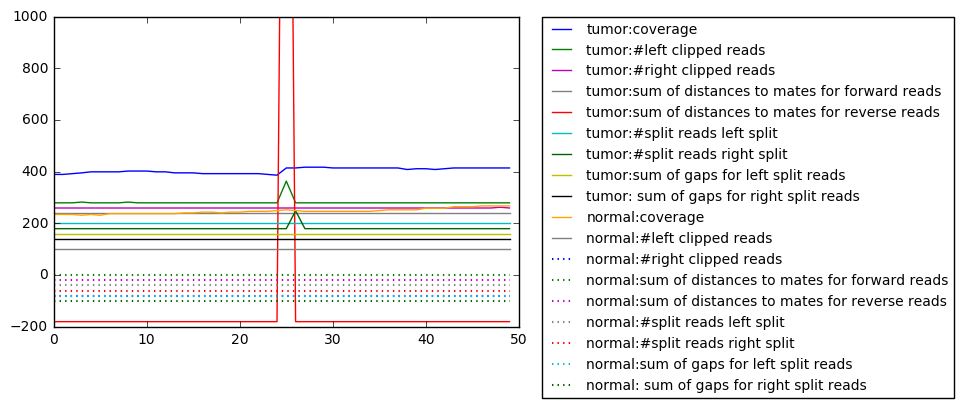

del_start id: 280
id: 280


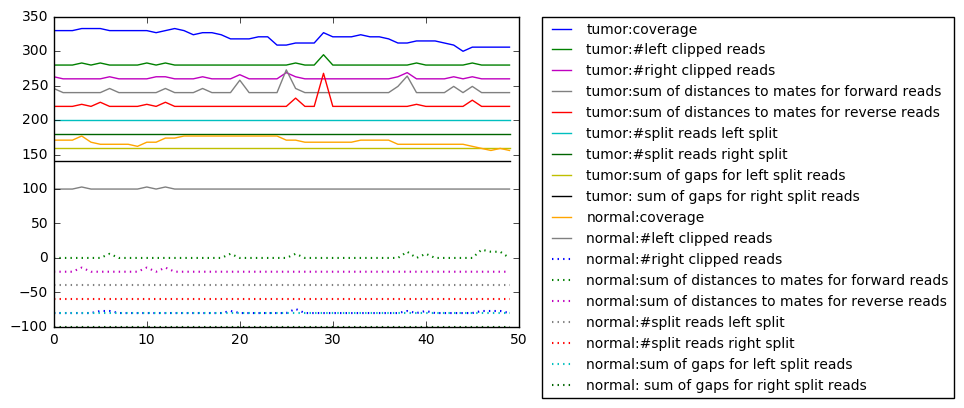

del_end id: 285
id: 285


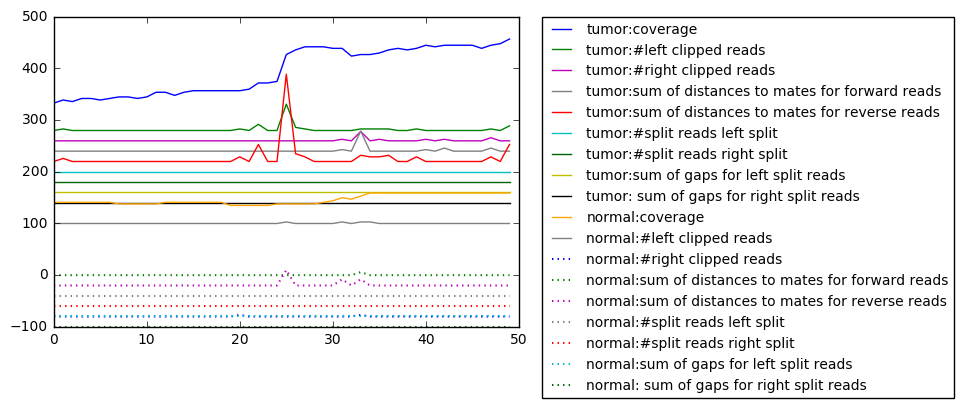

del_end id: 290
id: 290


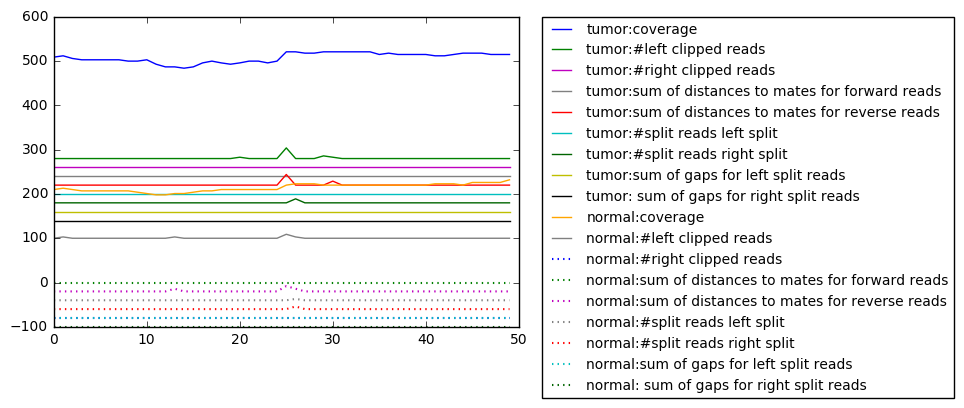

del_start id: 295
id: 295


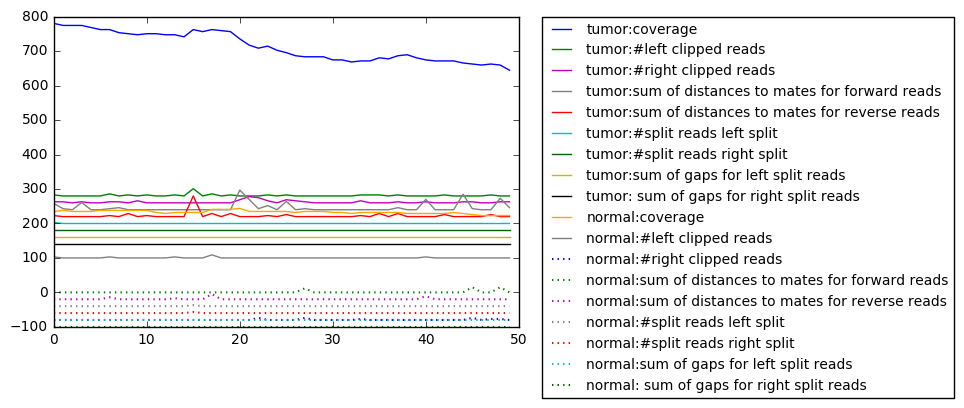

In [149]:
start_window = 200
n_windows = 100
X_train = X_test#only for plotting purposes
y_train=y_test
plot_channels(start_window, n_windows)

del_start id: 0
id: 0


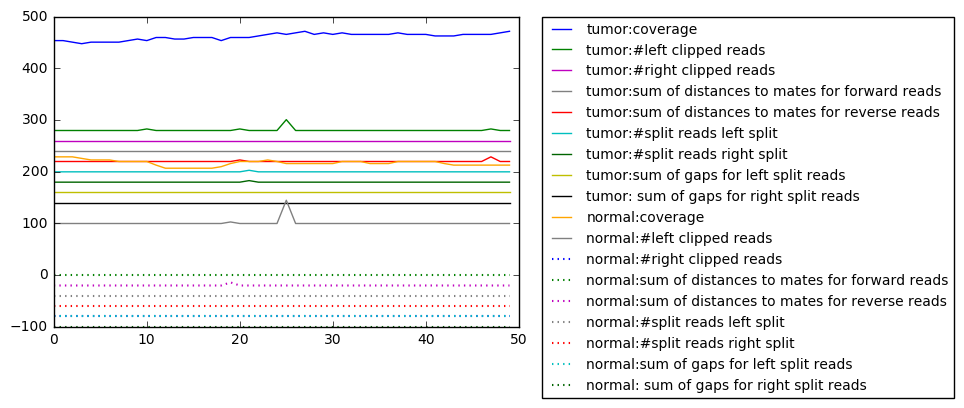

del_end id: 5
id: 5


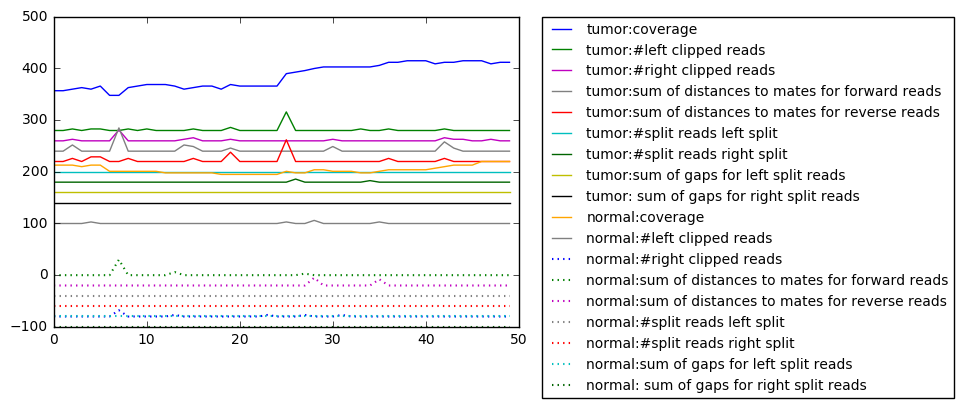

del_start id: 10
id: 10


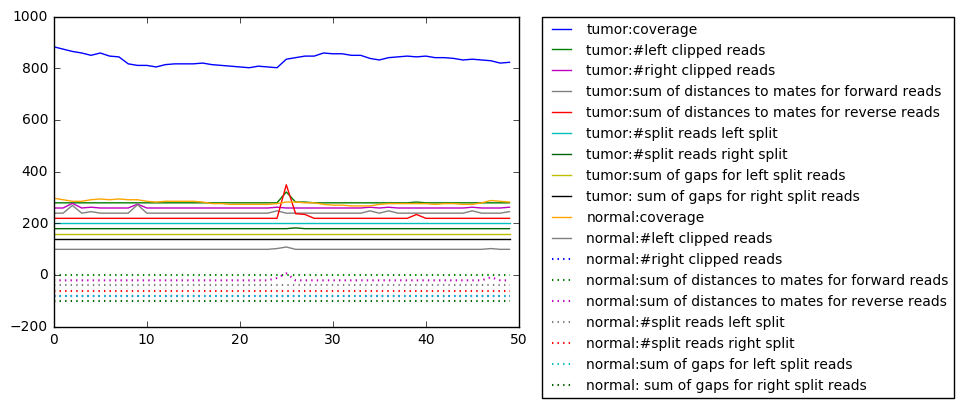

del_start id: 15
id: 15


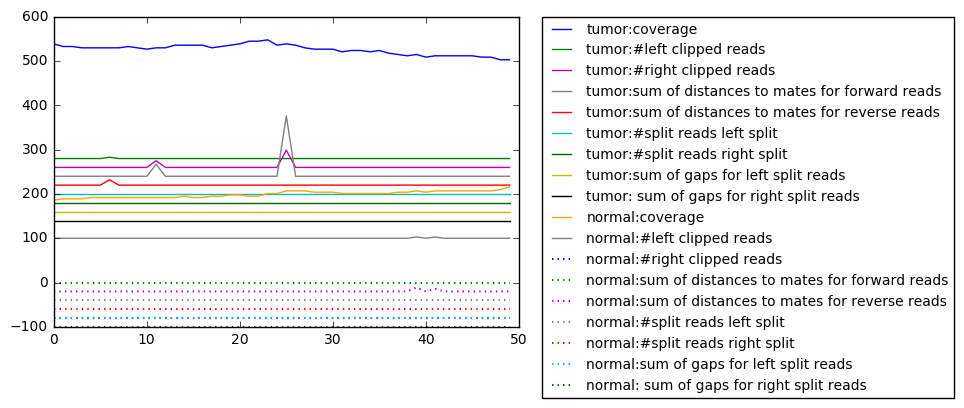

del_end id: 20
id: 20


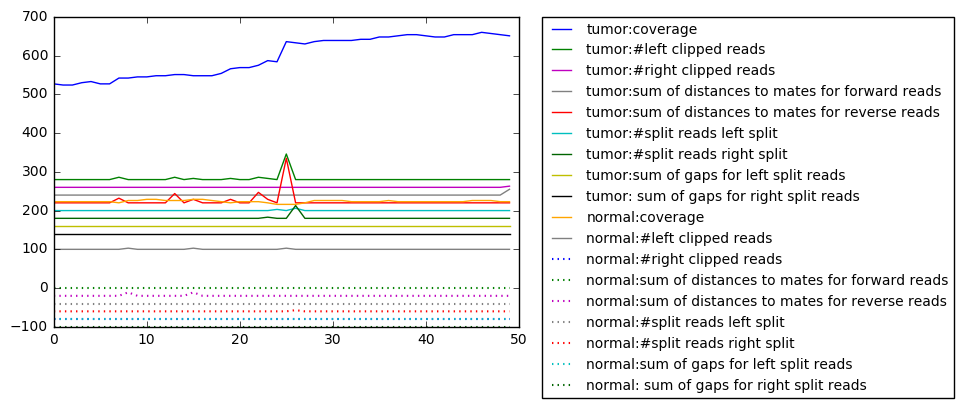

del_end id: 25
id: 25


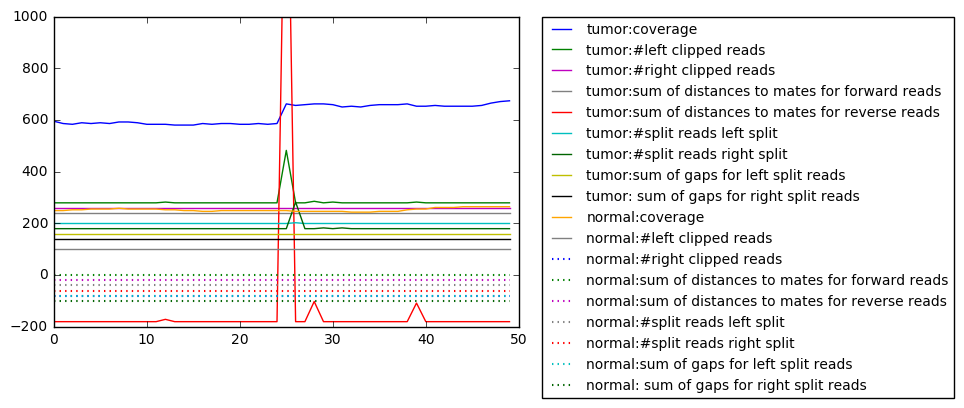

del_start id: 30
id: 30


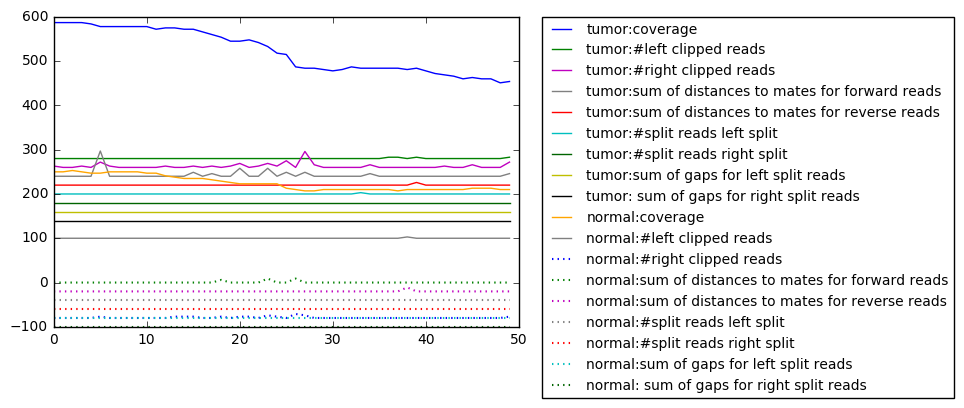

del_end id: 35
id: 35


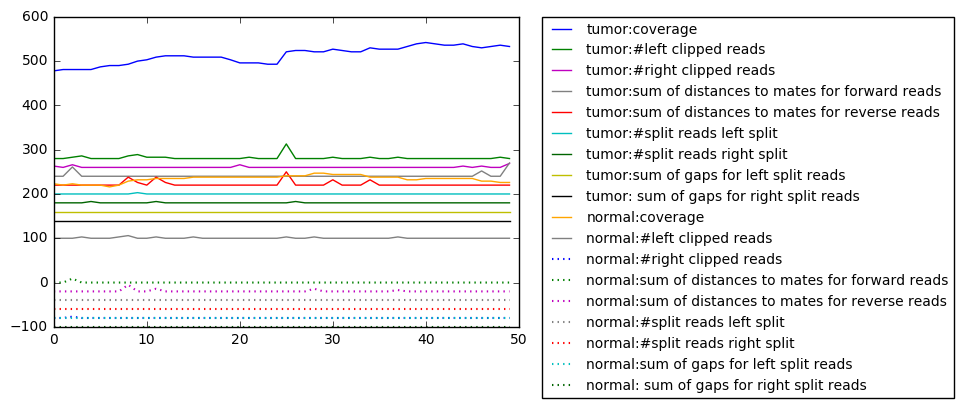

del_end id: 40
id: 40


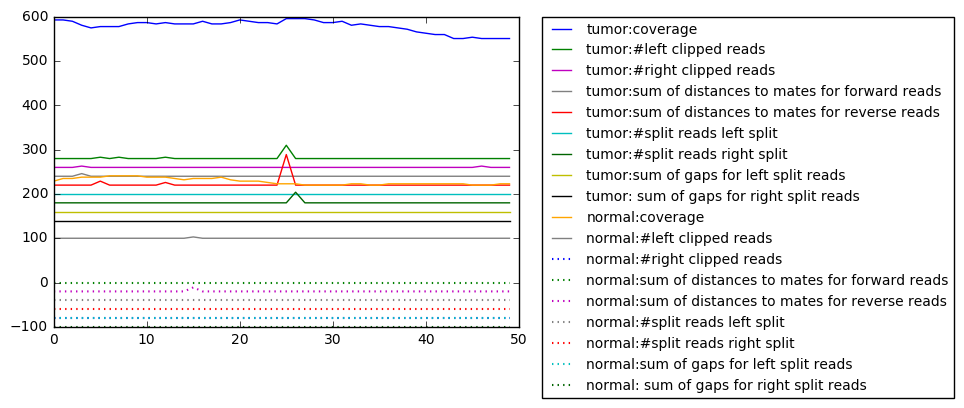

del_end id: 45
id: 45


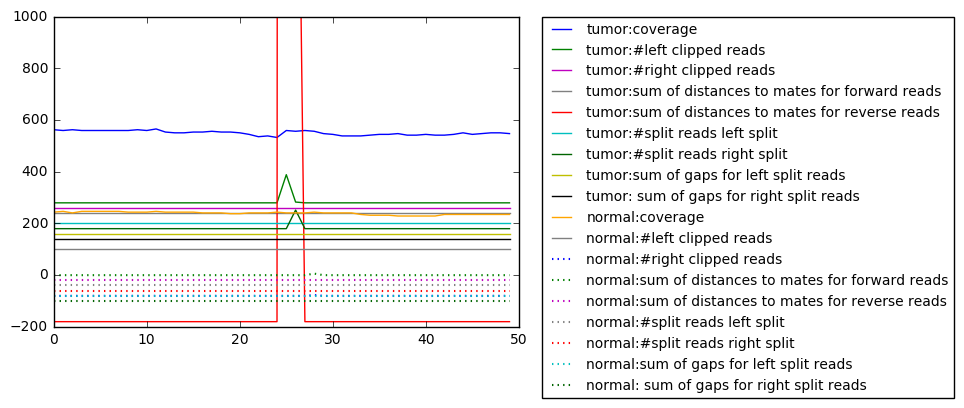

del_start id: 50
id: 50


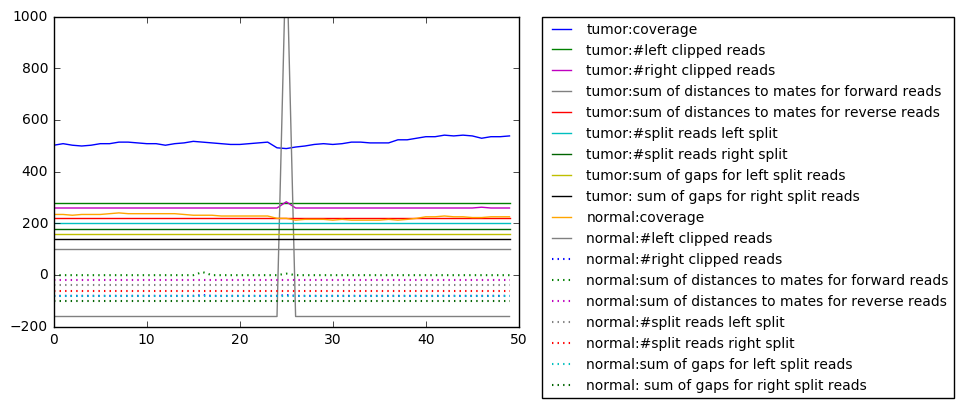

del_end id: 55
id: 55


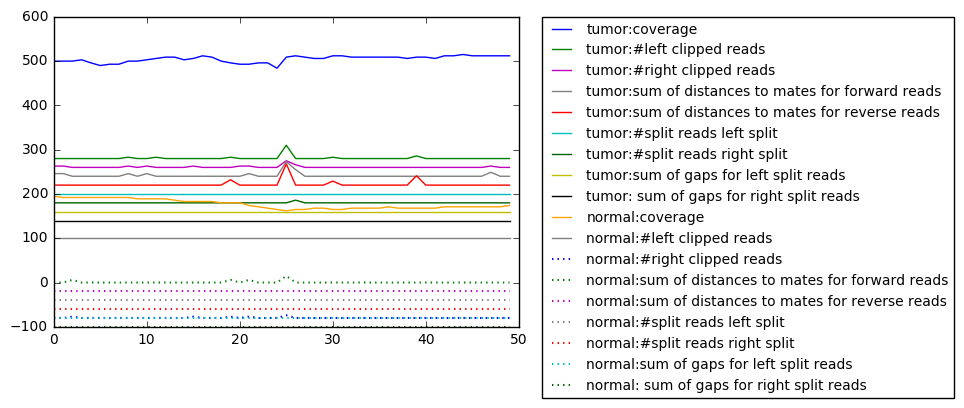

del_end id: 60
id: 60


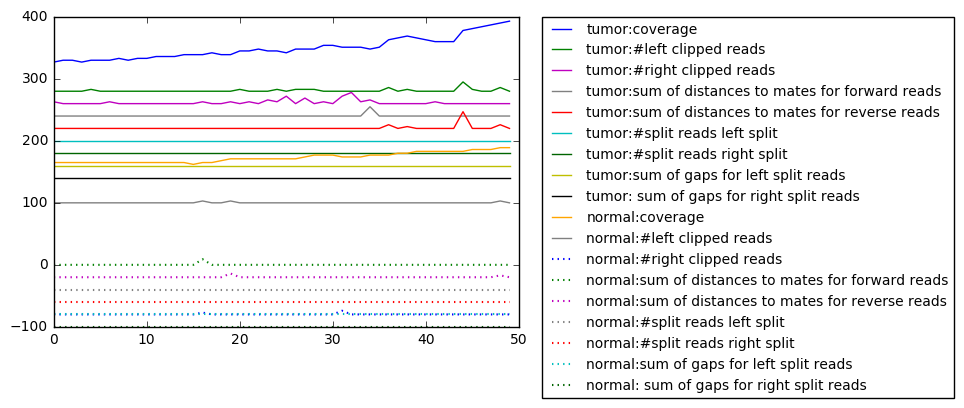

del_start id: 65
id: 65


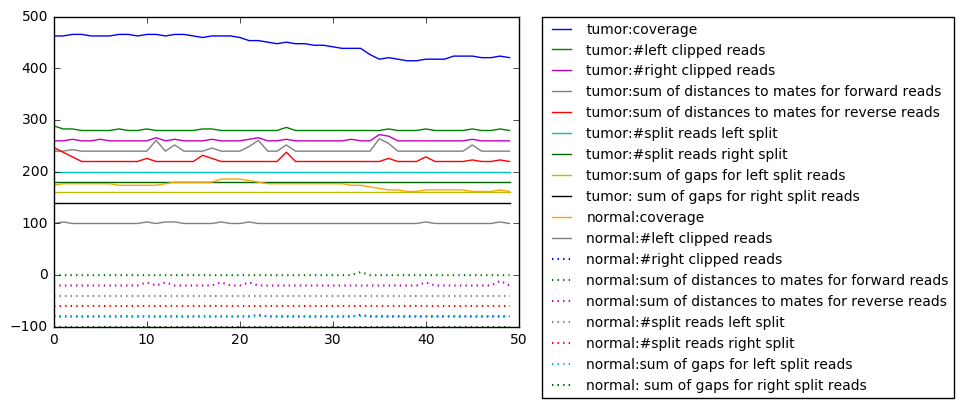

del_end id: 70
id: 70


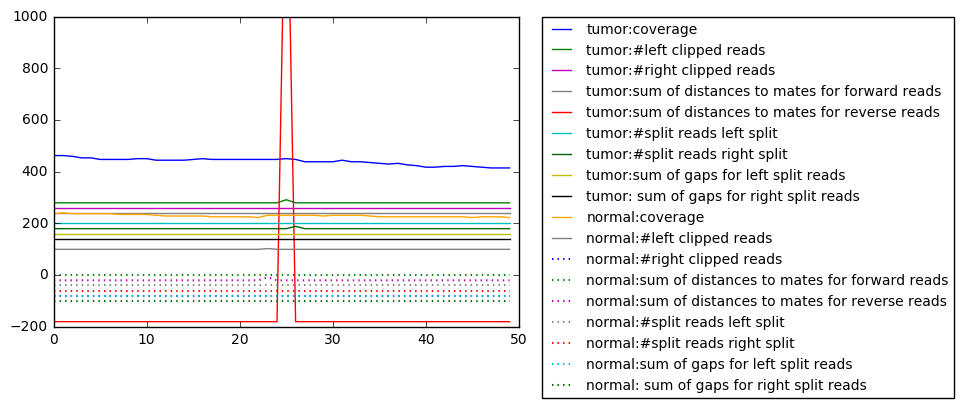

del_end id: 75
id: 75


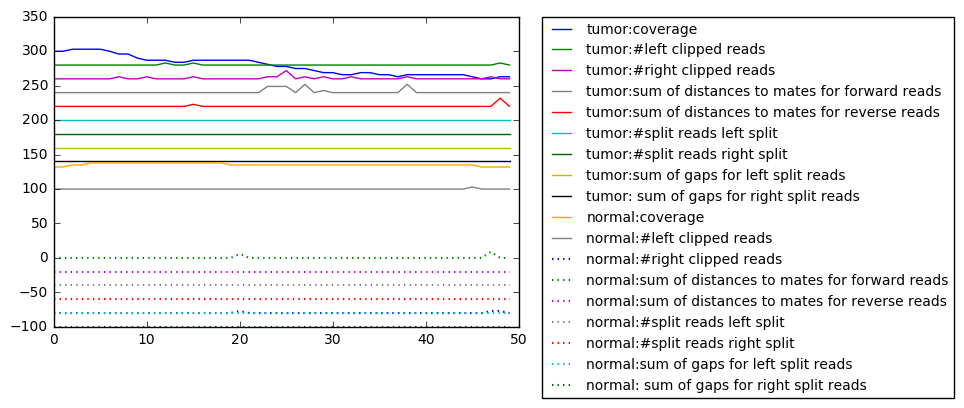

del_start id: 80
id: 80


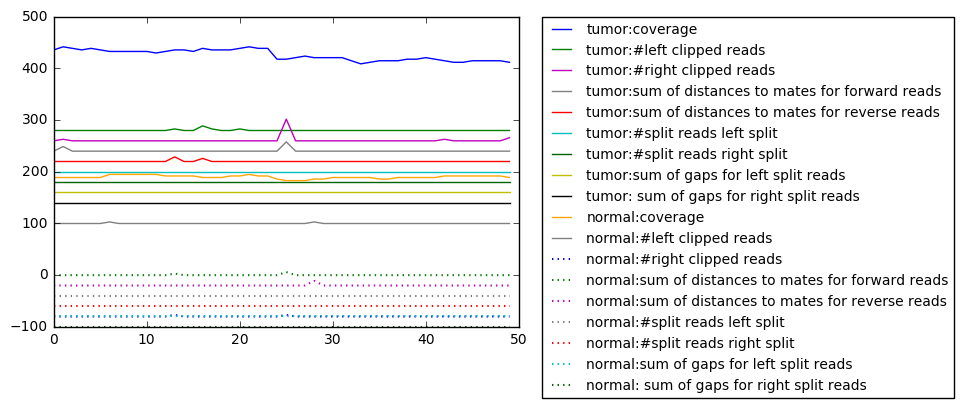

del_end id: 85
id: 85


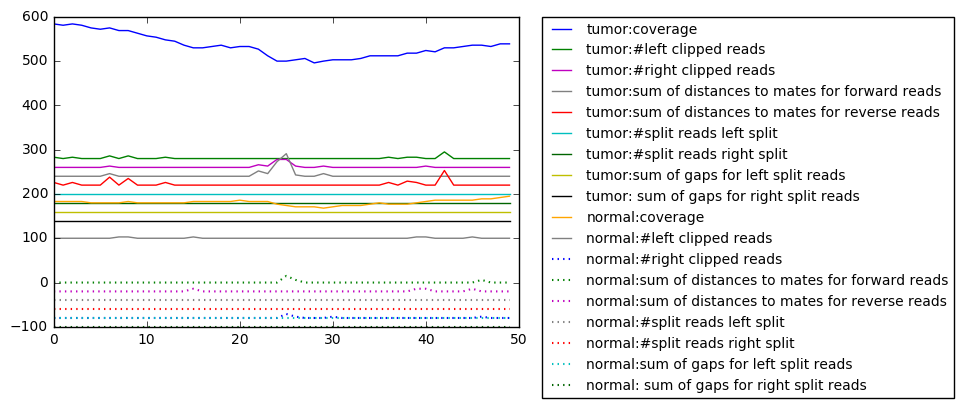

del_start id: 90
id: 90


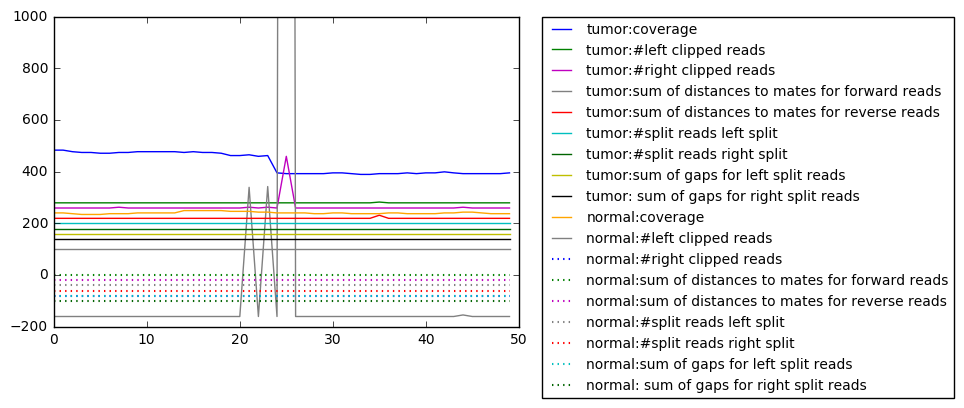

del_end id: 95
id: 95


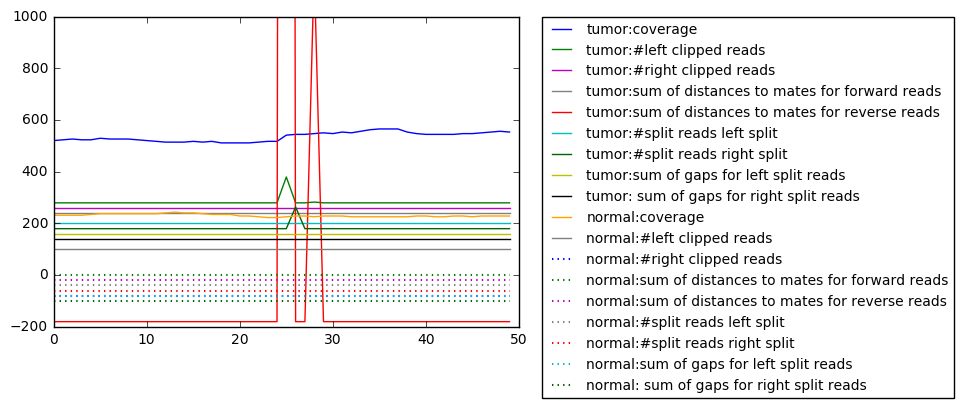

In [150]:
start_window = 0
X_train = X_test#only for plotting purposes
y_train=y_test
plot_channels(start_window, n_windows)

   
## Transposes every window in X, to comply to McFly format

In [179]:
def transposeDataset(X):
    image = []
    for i in range (0, len(X -1)):
        tr = X[i].transpose()
        image.append(tr)
    return np.array(image)

#image1 = transposeDataset(X_train)
#image2 = transposeDataset(X_val)
image3 = transposeDataset(X_test)
#X_train = image1
#X_val = image2
X_test = image3

n_channels = len(X_test[0][0])
print(len(X_test[0][0]))

18


## Prepare the labels in McFly format

In [180]:
mapclasses = { 'del_start': 0, 'ins_pos': 1, 'del_end': 2, 'no_del': 3 }

In [181]:
y_test_new = np.array([mapclasses[c] for c in y_test], dtype='int')
print(y_test_new)
y_test_binary = to_categorical(y_test_new, num_classes = 4)

[0 2 2 2 2 2 0 2 0 2 0 0 2 2 0 0 2 2 2 0 2 2 0 2 0 2 2 0 0 0 0 0 0 2 2 2 0
 0 2 0 2 0 2 2 0 2 2 0 0 2 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 0 0 2 2 0 2 0 2 0
 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 2 0
 0 2 2 2 0 0 2 2 0 2 0 2 0 0 0 2 2 2 2 0 0 0 0 2 0 0 2 2 2 2 2 2 0 0 0 0 2
 2 2 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 0 2 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 0 2 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 2 2 0 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 0 2 0 0 0 0 0 2 0 0 0 2 2 0 2 0 0 2 2 0 0
 0 2 0 2 2 2 0 2 0 0 2 0 2 0 0 0 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 0 2 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 0 2 2 0 2 0 2 2 2 2 0 0 0 0 0 0 0 0
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3]


In [182]:
y_test_binary

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.]])

## Generate neural networks architectures

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from mcfly import modelgen, find_architecture

In [80]:
np.random.seed = 321
num_classes = y_train_binary.shape[1]

In [100]:
%%time
models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=1,
                                  cnn_max_layers=1,
                                  cnn_min_fc_nodes=4, 
                                  cnn_max_fc_nodes=6,
                                  low_lr=4, high_lr=4)

Wall time: 841 ms


In [ ]:
%%time
for model, params, model_types in models:
    print(params)
    model.summary()

## Train the networks

In [96]:
train_set_size = X_train.shape[0]
train_set_size

600

In [ ]:
%%time
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                 X_val, y_val_binary,
                                                                                 models,nr_epochs=1, 
                                                                                  subset_size=train_set_size,
                                                                                  verbose=True)

## Plot training process

Currently run with a very low number of epochs

In [ ]:
%%time
for i in range(len(models)):
    name = str(models[i][1])
    find_architecture.plotTrainingProcess(histories[i], name)

In [ ]:
#%%time
import pandas as pd
results = pd.DataFrame({'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
results

## Take the best current model 

In [138]:
best_model_index = np.argmax(val_accuracies)

In [139]:
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

0 CNN {'regularization_rate': 0.013105109369632079, 'fc_hidden_nodes': 5, 'filters': array([47]), 'learning_rate': 0.0001}


## Save the best current model

In [140]:
from keras.models import load_model

model_path = os.path.join('F:/CNN/notebooks/', 'HMF_3_6channels')

best_model.save(model_path)

## Reload the best current model

In [183]:
import os
from keras.models import load_model
model_path = os.path.join('F:/CNN/notebooks/', 'Gtcg_230418')
model_reloaded = load_model(model_path)

## Columns are predicted, rows are labels

In [187]:
import pandas as pd
model = model_reloaded
datasize = X_test.shape[0]
probs = model.predict_proba(X_test[:datasize,:,:],batch_size=1)
labels =['DEL_start', 'INS_pos', 'DEL_end', 'noSV']
predicted = probs.argmax(axis=1)
y_index = y_test_binary.argmax(axis=1)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [labels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [labels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in labels], fill_value=0)
confusion_matrix

DEL_start  INS_pos  DEL_end  noSV
DEL_start         40      118        5     5
DEL_end           11      104       50     5
noSV              10      138        0     2

## Test best current model on testset

### Overall accuracy on the test set:

In [184]:
score_test = model_reloaded.evaluate(X_test, y_test_binary, verbose=False)
print('Test loss and accuracy of best model: ' + str(score_test))

Test loss and accuracy of best model: [3.5839130448513346, 0.18852459016393441]


### Re-check the train and validation scores: 

In [ ]:
best_model.get_config()[0]

In [ ]:
score_train = model_reloaded.evaluate(X_train, y_train_binary, verbose=False)
print('Train Score of best model: ' + str(score_train))

In [ ]:
score_val = model_reloaded.evaluate(X_val, y_val_binary, verbose=False)
print('Val Score of best model: ' + str(score_val))